In [1]:
from ecnet.datasets import load_cn, load_ysi, load_kv, load_cp, load_lhv

smiles_cn, cn = load_cn()
smiles_ysi, ysi = load_ysi()
smiles_kv, kv = load_kv()
smiles_cp, cp = load_cp()
smiles_lhv, lhv = load_lhv()

In [2]:
from sklearn.model_selection import train_test_split

smiles_cn_train, smiles_cn_test, cn_train, cn_test = train_test_split(smiles_cn, cn, test_size=0.2, random_state=42)
smiles_ysi_train, smiles_ysi_test, ysi_train, ysi_test = train_test_split(smiles_ysi, ysi, test_size=0.2, random_state=42)
smiles_kv_train, smiles_kv_test, kv_train, kv_test = train_test_split(smiles_kv, kv, test_size=0.2, random_state=42)
smiles_cp_train, smiles_cp_test, cp_train, cp_test = train_test_split(smiles_cp, cp, test_size=0.2, random_state=42)
smiles_lhv_train, smiles_lhv_test, lhv_train, lhv_test = train_test_split(smiles_lhv, lhv, test_size=0.2, random_state=42)

In [3]:
from ecnet.datasets import QSPRDataset

ds_cn_train = QSPRDataset(smiles_cn_train, cn_train, backend='alvadesc')
ds_cn_test = QSPRDataset(smiles_cn_test, cn_test, backend='alvadesc')

ds_ysi_train = QSPRDataset(smiles_ysi_train, ysi_train, backend='alvadesc')
ds_ysi_test = QSPRDataset(smiles_ysi_test, ysi_test, backend='alvadesc')

ds_kv_train = QSPRDataset(smiles_kv_train, kv_train, backend='alvadesc')
ds_kv_test = QSPRDataset(smiles_kv_test, kv_test, backend='alvadesc')

ds_cp_train = QSPRDataset(smiles_cp_train, cp_train, backend='alvadesc')
ds_cp_test = QSPRDataset(smiles_cp_test, cp_test, backend='alvadesc')

ds_lhv_train = QSPRDataset(smiles_lhv_train, lhv_train, backend='alvadesc')
ds_lhv_test = QSPRDataset(smiles_lhv_test, lhv_test, backend='alvadesc')

In [4]:
with open('models/cn/desc.txt', 'r') as f:
    desc_cn = [int(i) for i in f.readlines()]
f.close()

with open('models/ysi/desc.txt', 'r') as f:
    desc_ysi = [int(i) for i in f.readlines()]
f.close()

with open('models/kv/desc.txt', 'r') as f:
    desc_kv = [int(i) for i in f.readlines()]
f.close()

with open('models/cp/desc.txt', 'r') as f:
    desc_cp = [int(i) for i in f.readlines()]
f.close()

with open('models/lhv/desc.txt', 'r') as f:
    desc_lhv = [int(i) for i in f.readlines()]
f.close()

ds_cn_train.set_desc_index(desc_cn)
ds_cn_test.set_desc_index(desc_cn)
ds_ysi_train.set_desc_index(desc_ysi)
ds_ysi_test.set_desc_index(desc_ysi)
ds_kv_train.set_desc_index(desc_kv)
ds_kv_test.set_desc_index(desc_kv)
ds_cp_train.set_desc_index(desc_cp)
ds_cp_test.set_desc_index(desc_cp)
ds_lhv_train.set_desc_index(desc_lhv)
ds_lhv_test.set_desc_index(desc_lhv)

In [5]:
from ecnet.model import load_model

model_cn = load_model('models/cn/cn_0.pt')
model_ysi = load_model('models/ysi/ysi_0.pt')
model_kv = load_model('models/kv/kv_0.pt')
model_cp = load_model('models/cp/cp_0.pt')
model_lhv = load_model('models/lhv/lhv_0.pt')

In [6]:
from sklearn.metrics import median_absolute_error, r2_score

pred_cn_train = model_cn(ds_cn_train.desc_vals).detach().numpy()
pred_cn_test = model_cn(ds_cn_test.desc_vals).detach().numpy()

pred_ysi_train = model_ysi(ds_ysi_train.desc_vals).detach().numpy()
pred_ysi_test = model_ysi(ds_ysi_test.desc_vals).detach().numpy()

pred_kv_train = model_kv(ds_kv_train.desc_vals).detach().numpy()
pred_kv_test = model_kv(ds_kv_test.desc_vals).detach().numpy()

pred_cp_train = model_cp(ds_cp_train.desc_vals).detach().numpy()
pred_cp_test = model_cp(ds_cp_test.desc_vals).detach().numpy()

pred_lhv_train = model_lhv(ds_lhv_train.desc_vals).detach().numpy()
pred_lhv_test = model_lhv(ds_lhv_test.desc_vals).detach().numpy()

mae_cn_train = median_absolute_error(cn_train, pred_cn_train)
mae_cn_test = median_absolute_error(cn_test, pred_cn_test)
r2_cn_train = r2_score(cn_train, pred_cn_train)
r2_cn_test = r2_score(cn_test, pred_cn_test)

mae_ysi_train = median_absolute_error(ysi_train, pred_ysi_train)
mae_ysi_test = median_absolute_error(ysi_test, pred_ysi_test)
r2_ysi_train = r2_score(ysi_train, pred_ysi_train)
r2_ysi_test = r2_score(ysi_test, pred_ysi_test)

mae_kv_train = median_absolute_error(kv_train, pred_kv_train)
mae_kv_test = median_absolute_error(kv_test, pred_kv_test)
r2_kv_train = r2_score(kv_train, pred_kv_train)
r2_kv_test = r2_score(kv_test, pred_kv_test)

mae_cp_train = median_absolute_error(cp_train, pred_cp_train)
mae_cp_test = median_absolute_error(cp_test, pred_cp_test)
r2_cp_train = r2_score(cp_train, pred_cp_train)
r2_cp_test = r2_score(cp_test, pred_cp_test)

mae_lhv_train = median_absolute_error(lhv_train, pred_lhv_train)
mae_lhv_test = median_absolute_error(lhv_test, pred_lhv_test)
r2_lhv_train = r2_score(lhv_train, pred_lhv_train)
r2_lhv_test = r2_score(lhv_test, pred_lhv_test)

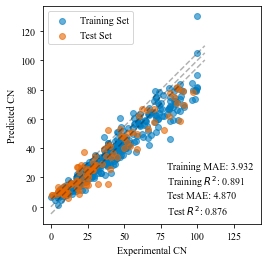

In [7]:
# CETANE NUMBER
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
min_val = min([c[0] for c in cn_train]) - 0.05 * min([c[0] for c in cn_train])
max_val = max([c[0] for c in cn_train]) + 0.05 * max([c[0] for c in cn_train])
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_cn_test, max_val + mae_cn_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_cn_test, max_val - mae_cn_test], 'k--', alpha=0.3)
plt.scatter(cn_train, pred_cn_train, color=(0, 114/235, 178/235), label='Training Set', alpha=0.6)
plt.scatter(cn_test, pred_cn_test, color=(213/235, 94/235, 0), label='Test Set', alpha=0.6)
plt.legend(loc='upper left')
txt = f'Training MAE: {mae_cn_train:.3f}\nTraining $R^2$: {r2_cn_train:.3f}\nTest MAE: {mae_cn_test:.3f}\nTest $R^2$: {r2_cn_test:.3f}'
box = AnchoredText(txt, frameon=True, loc='lower right', pad=0.2)
plt.setp(box.patch, facecolor='w', edgecolor='w')
plt.gca().add_artist(box)
plt.axis('square')
plt.show()

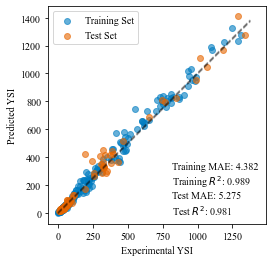

In [8]:
# YIELD SOOTING INDEX

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental YSI')
plt.ylabel('Predicted YSI')
min_val = min([c[0] for c in ysi_train]) - 0.05 * min([c[0] for c in ysi_train])
max_val = max([c[0] for c in ysi_train]) + 0.05 * max([c[0] for c in ysi_train])
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_ysi_test, max_val + mae_ysi_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_ysi_test, max_val - mae_ysi_test], 'k--', alpha=0.3)
plt.scatter(ysi_train, pred_ysi_train, color=(0, 114/235, 178/235), label='Training Set', alpha=0.6)
plt.scatter(ysi_test, pred_ysi_test, color=(213/235, 94/235, 0), label='Test Set', alpha=0.6)
plt.legend(loc='upper left')
txt = f'Training MAE: {mae_ysi_train:.3f}\nTraining $R^2$: {r2_ysi_train:.3f}\nTest MAE: {mae_ysi_test:.3f}\nTest $R^2$: {r2_ysi_test:.3f}'
box = AnchoredText(txt, frameon=True, loc='lower right', pad=0.2)
plt.setp(box.patch, facecolor='w', edgecolor='w')
plt.gca().add_artist(box)
plt.axis('square')
plt.show()

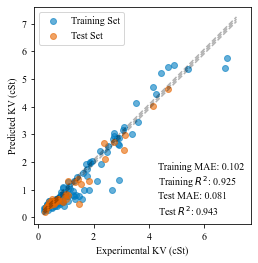

In [9]:
# KINEMATIC VISCOSITY

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental KV (cSt)')
plt.ylabel('Predicted KV (cSt)')
min_val = min([c[0] for c in kv_train]) - 0.05 * min([c[0] for c in kv_train])
max_val = max([c[0] for c in kv_train]) + 0.05 * max([c[0] for c in kv_train])
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_kv_test, max_val + mae_kv_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_kv_test, max_val - mae_kv_test], 'k--', alpha=0.3)
plt.scatter(kv_train, pred_kv_train, color=(0, 114/235, 178/235), label='Training Set', alpha=0.6)
plt.scatter(kv_test, pred_kv_test, color=(213/235, 94/235, 0), label='Test Set', alpha=0.6)
plt.legend(loc='upper left')
txt = f'Training MAE: {mae_kv_train:.3f}\nTraining $R^2$: {r2_kv_train:.3f}\nTest MAE: {mae_kv_test:.3f}\nTest $R^2$: {r2_kv_test:.3f}'
box = AnchoredText(txt, frameon=True, loc='lower right', pad=0.2)
plt.setp(box.patch, facecolor='w', edgecolor='w')
plt.gca().add_artist(box)
plt.axis('square')
plt.show()

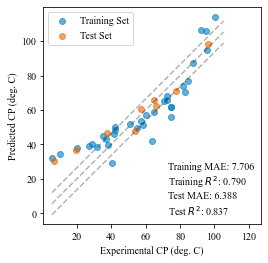

In [10]:
# CLOUD POINT

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental CP (deg. C)')
plt.ylabel('Predicted CP (deg. C)')
min_val = min([c[0] for c in cp_train]) - 0.05 * min([c[0] for c in cp_train])
max_val = max([c[0] for c in cp_train]) + 0.05 * max([c[0] for c in cp_train])
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_cp_test, max_val + mae_cp_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_cp_test, max_val - mae_cp_test], 'k--', alpha=0.3)
plt.scatter(cp_train, pred_cp_train, color=(0, 114/235, 178/235), label='Training Set', alpha=0.6)
plt.scatter(cp_test, pred_cp_test, color=(213/235, 94/235, 0), label='Test Set', alpha=0.6)
plt.legend(loc='upper left')
txt = f'Training MAE: {mae_cp_train:.3f}\nTraining $R^2$: {r2_cp_train:.3f}\nTest MAE: {mae_cp_test:.3f}\nTest $R^2$: {r2_cp_test:.3f}'
box = AnchoredText(txt, frameon=True, loc='lower right', pad=0.2)
plt.setp(box.patch, facecolor='w', edgecolor='w')
plt.gca().add_artist(box)
plt.axis('square')
plt.show()

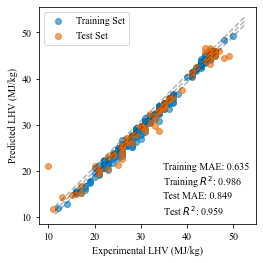

In [11]:
# LOWER HEATING VALUE

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental LHV (MJ/kg)')
plt.ylabel('Predicted LHV (MJ/kg)')
min_val = min([c[0] for c in lhv_train]) - 0.05 * min([c[0] for c in lhv_train])
max_val = max([c[0] for c in lhv_train]) + 0.05 * max([c[0] for c in lhv_train])
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_lhv_test, max_val + mae_lhv_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_lhv_test, max_val - mae_lhv_test], 'k--', alpha=0.3)
plt.scatter(lhv_train, pred_lhv_train, color=(0, 114/235, 178/235), label='Training Set', alpha=0.6)
plt.scatter(lhv_test, pred_lhv_test, color=(213/235, 94/235, 0), label='Test Set', alpha=0.6)
plt.legend(loc='upper left')
txt = f'Training MAE: {mae_lhv_train:.3f}\nTraining $R^2$: {r2_lhv_train:.3f}\nTest MAE: {mae_lhv_test:.3f}\nTest $R^2$: {r2_lhv_test:.3f}'
box = AnchoredText(txt, frameon=True, loc='lower right', pad=0.2)
plt.setp(box.patch, facecolor='w', edgecolor='w')
plt.gca().add_artist(box)
plt.axis('square')
plt.show()